In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_excel("BankNiftyFutures_Data5Min(work)(AutoRecovered).xlsx")
df.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,Unnamed: 10,Unnamed: 11
0,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0,18826.0996,27000,2015,NaN,NaN
1,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0,18810.0000,18025,2015,NaN,NaN
2,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0,18803.9492,60100,2015,NaN,NaN
3,BANKNIFTY_F1,2015-01-01,20150101,09:45:00,18803.9492,18829.9004,18800.0,18821.0000,26550,2015,NaN,NaN
4,BANKNIFTY_F1,2015-01-01,20150101,09:50:00,18821.0000,18839.0508,18820.0,18837.0000,22275,2015,NaN,NaN


In [38]:
df["ds"]=df['Date'].astype(str)

In [40]:
df["Timestr"]=df['Time'].astype(str)


In [41]:
df["Final_Date"] = df["ds"]+" "+df["Timestr"]
df["Final_Date"]

0        2015-01-01 09:30:00
1        2015-01-01 09:35:00
2        2015-01-01 09:40:00
3        2015-01-01 09:45:00
4        2015-01-01 09:50:00
                ...         
85383    2019-12-31 14:56:00
85384    2019-12-31 15:01:00
85385    2019-12-31 15:06:00
85386    2019-12-31 15:11:00
85387    2019-12-31 15:16:00
Name: Final_Date, Length: 85388, dtype: object

In [42]:
df["Final_Date"] = pd.to_datetime(df["Final_Date"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85388 entries, 0 to 85387
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ticker             85388 non-null  object        
 1   Date               85388 non-null  datetime64[ns]
 2   Final Date format  85388 non-null  int64         
 3   Time               85388 non-null  object        
 4   Open 5             85388 non-null  float64       
 5   High 5             85388 non-null  float64       
 6   Low 5              85388 non-null  float64       
 7   Close 5            85388 non-null  float64       
 8   Volume 5           85388 non-null  int64         
 9   Year               85388 non-null  int64         
 10  Unnamed: 10        0 non-null      float64       
 11  Unnamed: 11        0 non-null      float64       
 12  ds                 85388 non-null  object        
 13  Timestr            85388 non-null  object        
 14  Final_

In [44]:
df.drop(columns=['Date','Final Date format','Ticker','ds','Timestr','Unnamed: 10','Unnamed: 11'],inplace=True)

In [45]:
df.rename(columns={'Final_Date':'Date'},inplace=True)

In [46]:
df1=df.copy()

In [47]:
df.set_index('Date',inplace=True)

In [48]:
df.dropna(axis=1,inplace=True)

In [49]:
df

,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
Date,,,,,,,
2015-01-01 09:30:00,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
2015-01-01 09:35:00,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
2015-01-01 09:40:00,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015
2015-01-01 09:45:00,09:45:00,18803.9492,18829.9004,18800.0000,18821.0000,26550,2015
2015-01-01 09:50:00,09:50:00,18821.0000,18839.0508,18820.0000,18837.0000,22275,2015
...,...,...,...,...,...,...,...
2019-12-31 14:56:00,14:56:00,32423.8496,32425.5996,32374.3008,32382.9492,93320,2019
2019-12-31 15:01:00,15:01:00,32380.6504,32407.6992,32376.6504,32398.0000,49500,2019
2019-12-31 15:06:00,15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900,2019


In [50]:
df_15= df.resample('15min').agg({'Open 5':'first','High 5':'max','Low 5':'min','Close 5':'last','Volume 5':'sum'})
df_15

,Open 5,High 5,Low 5,Close 5,Volume 5
Date,,,,,
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800
2015-01-01 10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150
...,...,...,...,...,...
2019-12-31 14:15:00,32444.0000,32450.0000,32384.0000,32409.8496,96960
2019-12-31 14:30:00,32409.8496,32459.0000,32401.1992,32426.0996,56520
2019-12-31 14:45:00,32426.0996,32439.9492,32374.3008,32382.9492,114820


In [51]:
df_15.drop_duplicates(inplace=True)

In [52]:
df2=df_15.copy()

In [53]:
df2.reset_index(inplace=True)

In [54]:
df_15.rename(columns={'Open 5':'Open','High 5':'High','Low 5':'Low','Close 5':'Close','Volume 5':'Volume'} ,inplace=True)

In [55]:
def calculateVwap(data):
    data['TP'] = (data['High']+data['Low']+data['Close'])/3.0
    data['TradedValue']  = data['TP']*data['Volume']
    data['CumVolume'] = data['Volume'].cumsum()
    data['CumTradedValue'] = data['TradedValue'].cumsum()
    data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
    return data


In [56]:
dff=calculateVwap(df_15)
dff

,Open,High,Low,Close,Volume,TP,TradedValue,CumVolume,CumTradedValue,VWAP
Date,,,,,,,,,,
2015-01-01 09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125,18804.116533,1.976783e+09,105125,1.976783e+09,18804.116533
2015-01-01 09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575,18832.266933,1.498578e+09,184700,3.475360e+09,18816.244677
2015-01-01 10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300,18846.199867,8.914253e+08,232000,4.366786e+09,18822.351920
2015-01-01 10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800,18842.750000,5.238284e+08,259800,4.890614e+09,18824.534625
2015-01-01 10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150,18836.250000,2.665329e+08,273950,5.157147e+09,18825.139744
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 14:15:00,32444.0000,32450.0000,32384.0000,32409.8496,96960,32414.616533,3.142921e+09,4263262405,1.015707e+14,23824.630563
2019-12-31 14:30:00,32409.8496,32459.0000,32401.1992,32426.0996,56520,32428.766267,1.832874e+09,4263318925,1.015725e+14,23824.744631
2019-12-31 14:45:00,32426.0996,32439.9492,32374.3008,32382.9492,114820,32399.066400,3.720061e+09,4263433745,1.015762e+14,23824.975549


In [57]:
dj = dff.copy()

In [58]:
dff=dff.dropna(axis=0)

In [59]:
dff.reset_index(inplace=True)

In [60]:
dff

,Date,Open,High,Low,Close,Volume,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:30:00,18826.9492,18833.4004,18775.0000,18803.9492,105125,18804.116533,1.976783e+09,105125,1.976783e+09,18804.116533
1,2015-01-01 09:45:00,18803.9492,18850.0000,18800.0000,18846.8008,79575,18832.266933,1.498578e+09,184700,3.475360e+09,18816.244677
2,2015-01-01 10:00:00,18846.9004,18858.5996,18830.0000,18850.0000,47300,18846.199867,8.914253e+08,232000,4.366786e+09,18822.351920
3,2015-01-01 10:15:00,18848.5508,18858.0000,18830.0000,18840.2500,27800,18842.750000,5.238284e+08,259800,4.890614e+09,18824.534625
4,2015-01-01 10:30:00,18843.7500,18843.7500,18825.0000,18840.0000,14150,18836.250000,2.665329e+08,273950,5.157147e+09,18825.139744
...,...,...,...,...,...,...,...,...,...,...,...
29009,2019-12-31 14:15:00,32444.0000,32450.0000,32384.0000,32409.8496,96960,32414.616533,3.142921e+09,4263262405,1.015707e+14,23824.630563
29010,2019-12-31 14:30:00,32409.8496,32459.0000,32401.1992,32426.0996,56520,32428.766267,1.832874e+09,4263318925,1.015725e+14,23824.744631
29011,2019-12-31 14:45:00,32426.0996,32439.9492,32374.3008,32382.9492,114820,32399.066400,3.720061e+09,4263433745,1.015762e+14,23824.975549
29012,2019-12-31 15:00:00,32380.6504,32407.6992,32376.6504,32382.0000,95220,32388.783200,3.084060e+09,4263528965,1.015793e+14,23825.166810


In [61]:
#code to calculate total profit and loss for 5 days

p=0
l=0
for i in range(4):                #dff.shape[0]
    if dff.loc[i]['VWAP'] < dff.loc[i]['Close']:
        if (dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open']) >= 0:
            p+= (dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open'])
        else:
            l+= abs((dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open']))
    else:
        pass
print(p,l)

3.0996000000013737 12.05080000000089


In [62]:
dff.shape

(29014, 11)

In [63]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [64]:
dff["p"]=0
dff['l']=0

In [65]:
#code to calculate total profit and loss for 5 years
p=0
l=0
for i in range(dff.shape[0]-1):                
    if dff.loc[i]['VWAP'] < dff.loc[i]['Close']:
        if (dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open']) >= 0:
            p+= (dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open'])
            dff.loc[i+1,"p"]=(dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open'])
        else:
            l+= abs((dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open']))
            dff.loc[i+1,"l"]=(dff.loc[i+1]['Close'])-(dff.loc[i+1]['Open'])
        
    else:
        pass

print(p,l)

279204.8775999991 275411.03079999855


In [132]:
Overall_profit=p
Overall_loss=l

## Overall profit and loss


In [138]:
print("profit :",Overall_profit,"loss :",Overall_loss)

profit : 279204.8775999991 loss : 275411.03079999855


In [139]:
total_revenue=Overall_profit-Overall_loss
total_revenue

3793.846800000523

In [74]:
#dff["year"]=0
for i in range(dff.shape[0]):
    dff.loc[i,'year']=dff.loc[i,'Date'].year

In [113]:
x=dff.groupby('year')

In [114]:
Year_wise=x.agg({'p':'sum','l':'sum'})
Year_wise

,p,l
year,,
2015,14797.1644,-16243.2728
2016,34065.5536,-34707.7928
2017,53535.7996,-49701.3596
2018,75704.6332,-73440.0720
2019,101101.7268,-101318.5336


In [115]:
Year_wise['total profit or loss']=Year_wise['p']+Year_wise['l']

## Year_wise profit and loss

In [146]:
Year_wise

,year,p,l,total profit or loss
0,2015,14797.1644,-16243.2728,-1446.1084
1,2016,34065.5536,-34707.7928,-642.2392
2,2017,53535.7996,-49701.3596,3834.4400
3,2018,75704.6332,-73440.0720,2264.5612
4,2019,101101.7268,-101318.5336,-216.8068


In [147]:
Year_wise.reset_index(inplace=True)

In [148]:
filt =(Year_wise['total profit or loss']==Year_wise['total profit or loss'].max())
best_performing_year=Year_wise.loc[filt,['year','total profit or loss']]
best_performing_year

,year,total profit or loss
2,2017,3834.44


## best performing year

In [150]:
best_performing_year = best_performing_year.values.tolist()
print("best performing year :",best_performing_year[0][0])

best performing year : 2017.0


In [154]:
y=dff.groupby('Date')

In [155]:
Date_wise=y.agg({'p':'sum','l':'sum'})
Date_wise

,p,l
Date,,
2015-01-01 09:30:00,0.0000,0.0000
2015-01-01 09:45:00,0.0000,0.0000
2015-01-01 10:00:00,3.0996,0.0000
2015-01-01 10:15:00,0.0000,-8.3008
2015-01-01 10:30:00,0.0000,-3.7500
...,...,...
2019-12-31 14:15:00,0.0000,-34.1504
2019-12-31 14:30:00,16.2500,0.0000
2019-12-31 14:45:00,0.0000,-43.1504


In [156]:
Date_wise['total profit or loss']=Date_wise['p']+Date_wise['l']

In [157]:
Date_wise

,p,l,total profit or loss
Date,,,
2015-01-01 09:30:00,0.0000,0.0000,0.0000
2015-01-01 09:45:00,0.0000,0.0000,0.0000
2015-01-01 10:00:00,3.0996,0.0000,3.0996
2015-01-01 10:15:00,0.0000,-8.3008,-8.3008
2015-01-01 10:30:00,0.0000,-3.7500,-3.7500
...,...,...,...
2019-12-31 14:15:00,0.0000,-34.1504,-34.1504
2019-12-31 14:30:00,16.2500,0.0000,16.2500
2019-12-31 14:45:00,0.0000,-43.1504,-43.1504


In [159]:
Day_wise=Date_wise.resample("D").agg({"p":"sum","l":"sum","total profit or loss":"sum"})
Day_wise

,p,l,total profit or loss
Date,,,
2015-01-01,131.1016,-73.4512,57.6504
2015-01-02,343.7480,-139.7988,203.9492
2015-01-03,0.0000,0.0000,0.0000
2015-01-04,0.0000,0.0000,0.0000
2015-01-05,177.8984,-219.7032,-41.8048
...,...,...,...
2019-12-27,393.5976,-115.7988,277.7988
2019-12-28,0.0000,0.0000,0.0000
2019-12-29,0.0000,0.0000,0.0000


##  day wise profit and loss

In [160]:
#Day_wise.reset_index(inplace=True)
Day_wise

,Date,p,l,total profit or loss
0,2015-01-01,131.1016,-73.4512,57.6504
1,2015-01-02,343.7480,-139.7988,203.9492
2,2015-01-03,0.0000,0.0000,0.0000
3,2015-01-04,0.0000,0.0000,0.0000
4,2015-01-05,177.8984,-219.7032,-41.8048
...,...,...,...,...
1821,2019-12-27,393.5976,-115.7988,277.7988
1822,2019-12-28,0.0000,0.0000,0.0000
1823,2019-12-29,0.0000,0.0000,0.0000
1824,2019-12-30,270.1524,-401.5528,-131.4004


In [162]:
filta =(Day_wise['total profit or loss']==Day_wise['total profit or loss'].max())
best_performing_Day=Day_wise.loc[filta,['Date','total profit or loss']]
best_performing_Day

,Date,total profit or loss
1723,2019-09-20,2192.3008


## best performing day

In [164]:
best_performing_Day=best_performing_Day.values.tolist()
print("best_performing_Day :",best_performing_Day[0][0])

best_performing_Day : 2019-09-20 00:00:00


In [153]:
dff.set_index('Date',inplace=True)

## VWAP plot 5 years

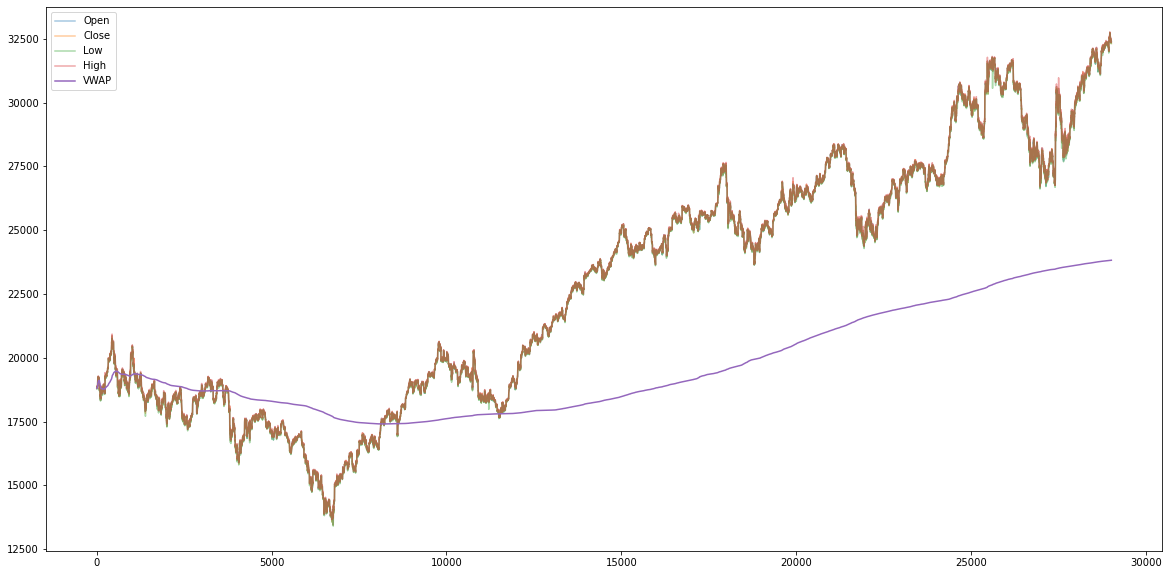

In [171]:
dff['Open'].plot(label='Open',figsize=(20,10),alpha=0.4)
dff['Close'].plot(label='Close',alpha=0.4)
dff['Low'].plot(label='Low',alpha=0.4)
dff['High'].plot(label='High',alpha=0.4)
dff['VWAP'].plot(label='VWAP',alpha=1)
plt.legend()